In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [69]:
df_data = pd.read_csv('./diabetes.csv')

In [70]:
df_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
df_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [33]:
df_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [34]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# 이상치 제거

<AxesSubplot:>

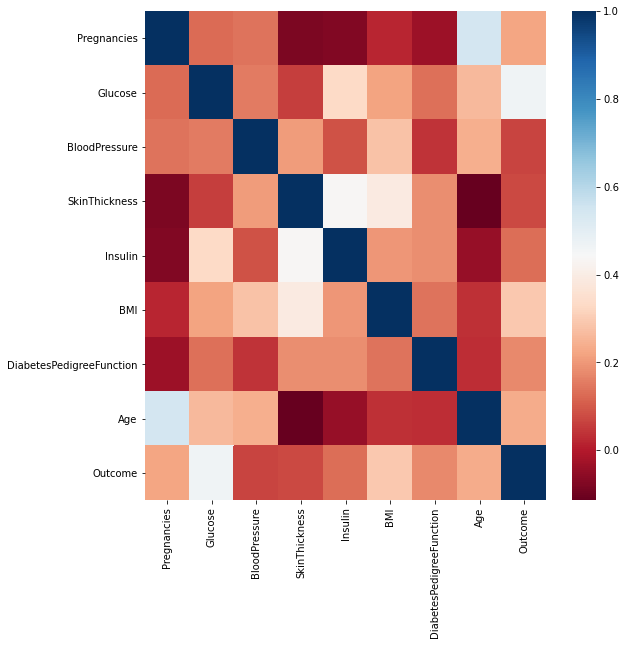

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
corr = df_data.corr()
sns.heatmap(corr, cmap='RdBu')

In [36]:
outlier_index = ['BloodPressure','Glucose','SkinThickness','Insulin','BMI']

for i in outlier_index:
    quantile_25 = np.percentile(df_data[i].values,25)
    quantile_75 = np.percentile(df_data[i].values,75)
    
    iqr = quantile_75 - quantile_25
    iqr = iqr * 1.5
    lowest_val = quantile_25 - iqr
    highest_val = quantile_75 + iqr
    
    df_data[df_data[i]<lowest_val] = lowest_val
    df_data[df_data[i]>highest_val] = highest_val

In [37]:
3df_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,8.531169,110.192627,68.458252,23.235596,62.927002,33.266325,5.540413,34.315023,5.416585
std,13.338372,37.919897,14.973316,16.346300,74.924822,7.685366,14.040823,11.822919,14.089380
min,0.000000,13.712500,13.712500,0.000000,0.000000,13.712500,0.078000,13.712500,0.000000
25%,1.000000,90.000000,60.000000,10.000000,0.000000,27.700000,0.257750,24.000000,0.000000
50%,4.000000,110.000000,70.000000,26.000000,37.000000,32.900000,0.428000,31.000000,0.000000
75%,8.000000,133.000000,78.000000,35.000000,106.000000,37.025000,0.762250,42.000000,1.000000
max,51.012500,199.000000,106.000000,60.000000,310.000000,51.012500,51.012500,81.000000,51.012500


# Data preprocessing

In [77]:


X = df_data.iloc[:,:-1]
y = df_data.iloc[:,-1]

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2, stratify=y, shuffle=True, random_state = 156)


# modeling

In [78]:
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,accuracy_score, f1_score, precision_score

In [79]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)
pred = lgbm.predict(X_valid)
acc = accuracy_score(y_valid,pred)
recall = recall_score(y_valid,pred)
f1 = f1_score(y_valid,pred)
precision = precision_score(y_valid,pred)
print(acc)
print(recall)
print(f1)
print(precision)

0.7012987012987013
0.5555555555555556
0.5660377358490566
0.5769230769230769


In [81]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_valid)
acc = accuracy_score(y_valid,pred)
recall = recall_score(y_valid,pred)
f1 = f1_score(y_valid,pred)
precision = precision_score(y_valid,pred)
print(acc)
print(recall)
print(f1)
print(precision)

0.7727272727272727
0.5740740740740741
0.6391752577319588
0.7209302325581395


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
